In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('breast-cancer.csv')

In [3]:
df=pd.DataFrame(data)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
mat=df.corr().abs()

In [5]:
mat
df.shape

(569, 32)

C:\Users\PRAYAG\AppData\Local\Temp/ipykernel_7692/3680691427.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = mat.where(np.triu(np.ones(mat.shape),k=1).astype(np.bool))


<AxesSubplot:>

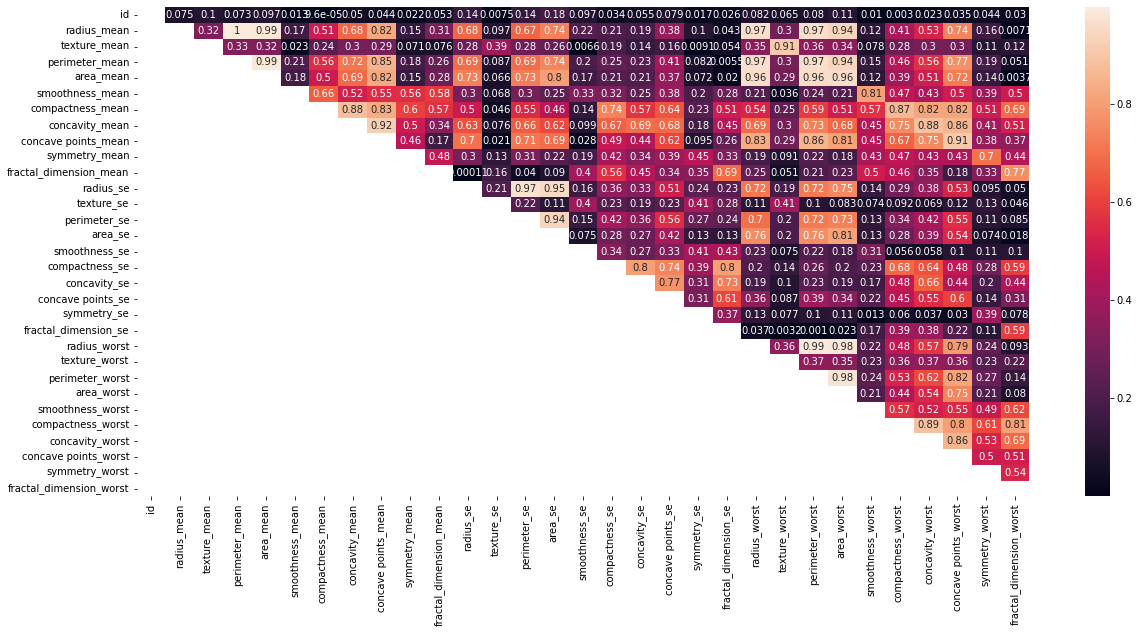

In [6]:
import numpy as np
plt.figure(figsize=(20,9))
upper_tri = mat.where(np.triu(np.ones(mat.shape),k=1).astype(np.bool))
sns.heatmap(upper_tri,annot=True)

In [7]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
to_drop

['perimeter_mean',
 'area_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

In [8]:
df1=df.drop(to_drop+['id'],axis=1)
df1.shape

(569, 21)

In [9]:
df1.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,...,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,M,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,...,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,M,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,...,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,M,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,...,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,M,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,...,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


In [10]:
df1['diagnosis']=df1['diagnosis'].map({'M':0,'B':1})

df1.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,...,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,0,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,...,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,0,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,...,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,0,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,...,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,0,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,...,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


In [11]:
X=df1.drop(['diagnosis'],axis=1)
y=df1.diagnosis

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
from sklearn.model_selection import GridSearchCV
parameters={'penalty':['l1','l2','elasticnet'],'C':[0.1,0.5,1,2,3,4,5,6,10,20,30,40,50,100],'max_iter':[50,100,150,200,250,300]}

classifier_regressor = GridSearchCV(classifier,param_grid=parameters,scoring='accuracy',cv=5)

In [16]:
classifier_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50,
                               100],
                         'max_iter': [50, 100, 150, 200, 250, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [17]:
classifier_regressor.best_score_

0.9714285714285715

In [18]:
classifier_regressor.best_params_

{'C': 100, 'max_iter': 200, 'penalty': 'l2'}

In [19]:
y_pred=classifier_regressor.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score)

0.9824561403508771


In [20]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        41
           1       1.00      0.97      0.99        73

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



In [21]:
probs = classifier_regressor.predict_proba(X_test)
preds = probs[:,1]

In [22]:
from sklearn.metrics import roc_auc_score

scr=roc_auc_score(y_test,preds)

print(scr)

0.9954143465443825


In [23]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=12)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=12)

In [24]:
y_pred_dt = dt.predict(X_test)
dt_score=accuracy_score(y_pred_dt,y_test)
print(dt_score)

0.9122807017543859


In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=12)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=12)

In [26]:
y_pred_rf = rf.predict(X_test)
rf_score=accuracy_score(y_pred_rf,y_test)
print(rf_score)

0.956140350877193


In [27]:
pd.options.display.float_format = '{:,.3f}'.format
score_df = pd.DataFrame({'Classifier':['Logistic Regression','Decision Tree Classifier','Random Forest Classifier'],'Score':[score,dt_score,rf_score]})
score_df

,Classifier,Score
0,Logistic Regression,0.982
1,Decision Tree Classifier,0.912
2,Random Forest Classifier,0.956


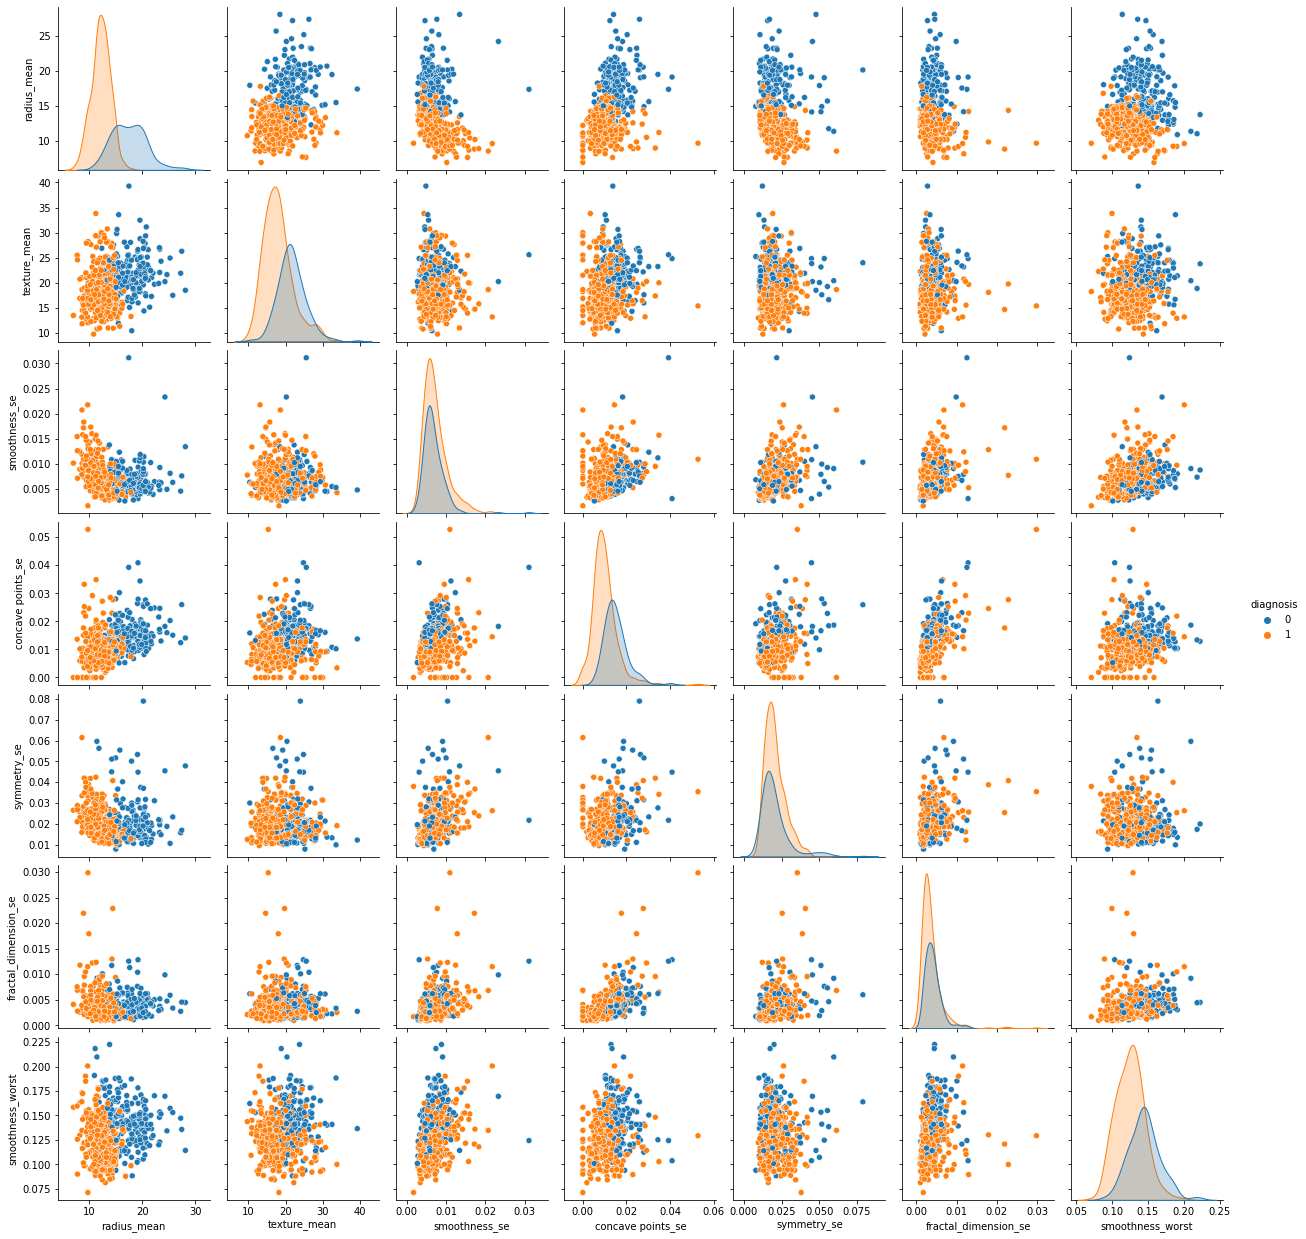

In [28]:
sns.pairplot(df1.drop(['smoothness_mean','compactness_mean','concavity_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','compactness_se','concavity_se','compactness_worst','concavity_worst','symmetry_worst','fractal_dimension_worst'],axis=1),hue='diagnosis')

# Thank you !!!